In [1]:
import numpy as np
import pandas as pd
import re, os, path, csv
import glob

import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys
sys.path.insert(0, r'C:\Users\shadd\OneDrive\Documents\Python\frxas.py')
sys.path.insert(0, r'C:\Users\shadd\OneDrive\Documents\Python\Xray-project\Dynamic XAS')

from numpy import fft
from frxas import time_domain, models, hdf5_io
import D_XAS_Function_Definitions as D_XAS
%reload_ext autoreload
%autoreload 2

In [2]:
def sort_func(all_files):
    return int(all_files.split('\\E')[-1].split('_E')[0])

def colorfun(V,Max=1):
#     print(V, Max)
    if V>0:
        R=V/Max
        G=0
        B=0
    else:
        R=0
        G=0
        B=-V/Max
    return (R,G,B)

In [35]:
direc = r'C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\fr_XAS\\Feb2018 Data Fits\\Energy Spectrum_1Hz\\'
match_str = 'E*_EtaAlign_Ir.h5'
match_str_eta = 'E*_EtaAlign_Eta.h5'
all_files = glob.glob(os.path.join(direc,match_str))
all_files.sort(key=sort_func)

all_files_eta = glob.glob(os.path.join(direc,match_str_eta))
all_files_eta.sort(key=sort_func)

In [36]:
models_Ir, models_Eta = [], []
for file, file_eta in zip(all_files, all_files_eta):
    models_Ir.append(hdf5_io.load_time_domain_fit(file[:-3]))
    models_Eta.append(hdf5_io.load_time_domain_fit(file_eta[:-3]))
meta = np.genfromtxt('..\\Feb2018 Data Fits\\Energy Spectrum_1Hz\\Energies_Iravgs.csv', delimiter=',',skip_header=1)
energies = meta[:,1]
Ir_avgs = meta[:,2]

In [37]:
Irs, Etas, Ir_actual = [], [], []
for model_Ir, model_Eta, Ir_avg in zip(models_Ir, models_Eta, Ir_avgs):
    Ns = int(model_Ir.ndata/2)
    dt = 1/(model_Ir.userkws['frequencies'][0]*-2)
    freq_in = model_Ir.userkws['freq_in']
    b = model_Ir.userkws['window_param']
    ti = np.linspace(0, dt*(Ns-1),num=Ns)
    Ns_wfm = int(1/freq_in/dt)
    Ir = fft.ifft(fft.ifftshift(model_Ir.eval()*(Ns*np.pi)))
    Eta = fft.ifft(fft.ifftshift(model_Eta.eval()*(Ns*np.pi)))
    window = time_domain.gauss_window(np.ones(Ns), freq_in, ti, b)
    ti = ti[:Ns_wfm]
    Irs.append(Ir[:Ns_wfm]/window[:Ns_wfm])
    Etas.append(Eta[:Ns_wfm]/window[:Ns_wfm])
    Ir_actual.append(Ir[:Ns_wfm]/window[:Ns_wfm] + Ir_avg)
Irs = np.array(Irs)
Etas = np.array(Etas)
Ir_actual = np.array(Ir_actual)

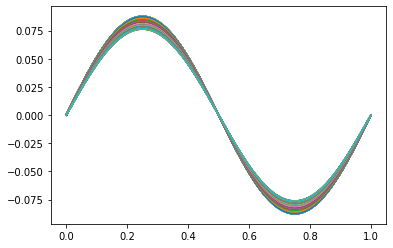

In [38]:
_, ax = plt.subplots()
maxes=[]
for eta in Etas:
    maxes.append(np.max(eta.real))
    ax.plot(ti, eta.real)

In [39]:
Ir_actual.shape

(180, 1000)

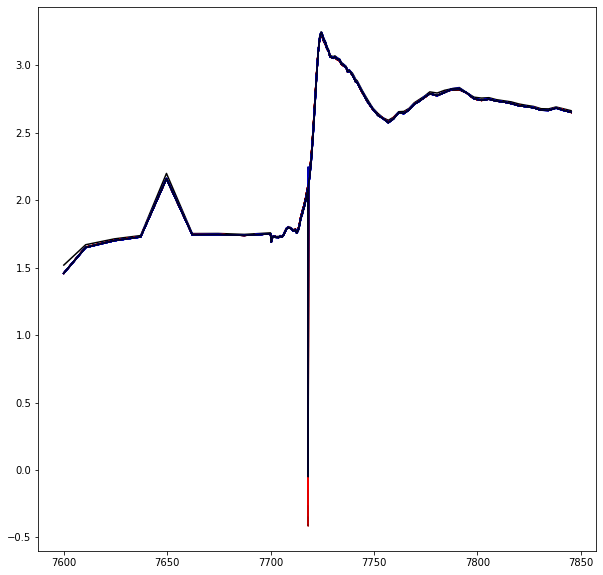

In [40]:
_, ax1 = plt.subplots( figsize=(10,10))

for i in range(0, 40):
    ax1.plot(energies, Ir_actual[:,i*25].real, color=colorfun(Etas[0,i*25].real,np.max(Etas[0,:].real)))
# ax1.set_xlim(7718, 7721)
# ax1.set_ylim(2.3,2.48)

In [44]:
direc = r'C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\fr_XAS\\Feb2018 Data Fits\\1 Hz XANES by Eta\\'
for i, (Ir,eta) in enumerate(zip(Ir_actual[:,::25].T,Etas[0,::25])):
    
    svname = direc + f'{i} Eta {eta.real*1000:.1f} mV.txt'
    svdat = np.concatenate((energies[None].T, Ir[None].T.real), axis=1)
    print(svname, svdat.shape)
    np.savetxt(svname, svdat, delimiter='\t', fmt='%.8e')

C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\fr_XAS\\Feb2018 Data Fits\\1 Hz XANES by Eta\\0 Eta 0.1 mV.txt (180, 2)
C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\fr_XAS\\Feb2018 Data Fits\\1 Hz XANES by Eta\\1 Eta 13.4 mV.txt (180, 2)
C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\fr_XAS\\Feb2018 Data Fits\\1 Hz XANES by Eta\\2 Eta 26.5 mV.txt (180, 2)
C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\fr_XAS\\Feb2018 Data Fits\\1 Hz XANES by Eta\\3 Eta 38.9 mV.txt (180, 2)
C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\fr_XAS\\Feb2018 Data Fits\\1 Hz XANES by Eta\\4 Eta 50.4 mV.txt (180, 2)
C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\fr_XAS\\Feb2018 Data Fits\\1 Hz XANES by Eta\\5 Eta 60.6 mV.txt (180, 2)
C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\fr_XAS\\Feb2018 Data Fits\\1 Hz XANES by Eta\\6 Eta 69.4 mV.txt (180, 2)
C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\fr

In [9]:
fname = 'C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\fr_XAS\\Feb2018 Data Fits\\0.5 Hz XANES by Eta\\0.5 Hz Normalized.csv'

dat = np.array(pd.read_csv(fname, delimiter=',', header=None, skiprows=1))
energies_norm = dat[:,0]
Ir_norm = dat[:,1:]
Eta_norm = 

In [12]:
Etas.shape

(180, 2000)

In [10]:
def plotXANES(energies, Irs, Etas, start_eta=0, stop_eta=0, marker='.', inset_dict={},
             startE=7705, stopE=7730, startInE=7718, stopInE=7720, size=(9, 6)):
    if not inset_dict:
        inset_dict = {'x1_adj': 0, 'x2_adj': 0, 'x_interval':0.1, 'y1_adj': 0,
                      'y2_adj': 0, 'y_interval': 0.02, 'x_lateral': 0,
                      'y_vertical':0}
    
    x1_adj = inset_dict['x1_adj']
    x2_adj = inset_dict['x2_adj']
    x_interval = inset_dict['x_interval']
    y1_adj = inset_dict['y1_adj']
    y2_adj = inset_dict['y2_adj']
    y_interval = inset_dict['y_interval']
    x_lat = inset_dict['x_lateral']
    y_vert = inset_dict['y_vertical']

    title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal'}
    mpl.rcParams['xtick.labelsize'] = 16
    mpl.rcParams['ytick.labelsize'] = 16
    mpl.rcParams['legend.fontsize'] = 16
    mpl.rcParams['axes.labelsize'] = 16


    # Finding max and min of Ir across all data sets for setting plot limits
    Ir_abs_max = np.max(Irs)
    Ir_abs_min = np.round(np.min(Ir_norm[np.argwhere(energies>=startE)[0][0], :]), 2)

    # Finding max and min of eta (or voltage) for setting color bar limits
    max_eta = int(round(np.max(Etas) * 1000, 0))
    min_eta = int(round(np.min(Etas) * 1000, 0))

    ## Plotting full XANES spectra
    fig = plt.figure(constrained_layout=False, figsize=size)
    gs = fig.add_gridspec(5, 20)
    f_ax1 = fig.add_subplot(gs[:, :-1])

    for n in range(start_eta, Irs.shape[-1] - stop_eta):
        f_ax1.plot(energies, Irs[:, n], color=colorfun(Etas[n], np.max(Etas)),
                 linestyle='-',linewidth=.3, marker='', markersize=3,
                   label=f'{Etas[n]} mV')

    f_ax1.set(xlim=[startE,stopE], ylim=[.97 * Ir_abs_min, 1.05 * Ir_abs_max])
    f_ax1.set_ylabel(r'Absorption  / a.u.', **title_font)
    f_ax1.set_xlabel(r'Energy  /  eV', **title_font)

    ## Plotting XANES inset
    f_ax2=fig.add_subplot(gs[0:3,3:11])    
    for n in range(start_eta, Irs.shape[-1] - stop_eta):
        f_ax2.plot(energies, Irs[:, n], color=colorfun(Etas[n], np.max(Etas)),
                 linestyle='-',linewidth=.5, marker=marker, markersize=3,
                   label=f'{Etas[n]} mV')
    f_ax2.set(xlim=[startInE,stopInE])

    ## Choosing plot limits for inset
    xind1=np.argwhere(energies>=startInE)[0]
    xind2=np.argwhere(energies<=stopInE)[-1]

    x1=round(energies[xind1][0])
    x2=round(energies[xind2][0])

    y1=round(Irs[xind1,0][0]*.95,2)
    y2=round(Irs[xind2,0][0]*1.05,2)

    f_ax2.set(xlim=[x1+x1_adj, x2+x2_adj], xticks=np.arange(x1+x1_adj, x2+x2_adj, x_interval),
              ylim=[y1+y1_adj, y2+y2_adj], yticks=np.arange(y1+y1_adj, y2+y2_adj, y_interval))

    f_ax2.set(xlim=[x1+x_lat+x1_adj, x2+x_lat+x2_adj], 
              xticks=np.arange(x1+x1_adj, x2+x2_adj, x_interval),
              ylim=[y1+y_vert+y1_adj, y2+y_vert+y2_adj], 
              yticks=np.arange(y1+y1_adj, y2+y2_adj,y_interval))

    # Plotting colorbar
    f_ax3=fig.add_subplot(gs[:3,-1])
    cdict = {'red':   [(0.0, 0.0, 0.0),
                               (0.5, 0.0, 0.0),
                               (1.0, 1.0, 1.0)],

                     'green': [(0.0, 0.0, 0.0),
                               (0.5, 0.0, 0.0),
                               (1.0, 0.0, 0.0)],

                     'blue':  [(0.0, 1.0, 1.0),
                               (0.5, 0.0, 0.0),
                               (1.0, 0.0, 0.0)],}

    cmap_name = 'my_list'
    cm = mpl.colors.LinearSegmentedColormap(cmap_name, cdict, N=100)
    norm = mpl.colors.Normalize(vmin=min_eta, vmax=max_eta)
    cb1=mpl.colorbar.ColorbarBase(f_ax3, cmap=cm, norm=norm, orientation='vertical')
    cb1.set_ticks([min_eta, 0, max_eta])
    cb1.set_label('mV',rotation=0, labelpad=-3, verticalalignment='center')
    
    return fig

In [11]:
inset_dict = {'x1_adj': 0, 'x2_adj': -0.6, 'x_interval':1, 'y1_adj': 0.05,
                      'y2_adj': -0.18, 'y_interval': 0.05, 'x_lateral': -.1,
                      'y_vertical':0}
fig = plotXANES(energies_norm, Ir_norm, Eta_norm, startE=7705,stopE=7730,startInE=7719,stopInE=7721.5,
               inset_dict=inset_dict, size=(9,6), marker='')

NameError: name 'Eta_norm' is not defined